# Analyze the COVID-19 Mortality Rate with respect to Different Variables

*$\color{gray}{\text{ "What factors will create significant impacts on the COVID-19 mortality rate? And how?" }}$*


### Examine the Relation between the COVID-19 Mortality Rate and Confirmation Count, Death Count, Countries and their Individual Wealth, Omicron Proportion

------
*Chenxu Robin Mao | robin.mao@mail.utoronto.ca*


## Summary


To date, the COVID-19 epidemic is still a major global concern. With recent data showing the COVID-19 confirmation toll reaching 671M with the total death roll of 6.83M $^{(1)}$. Different governmental institutions around the globe have brought up various policies to ensure the public health; however, the distortion brought by the virus is irreversible. Thus, with the data provided from Johns Hopkins University, the World Bank and Kaggle, I found it would be meaningful to investigate the relations between the COVID-19 mortality rate and certain variables, including COVID-19 confirmation count, death count, countries and their individual wealth and omicron proportion (terms will be formally defined later).


Throughout this report, the y variable will be the COVID-19 mortality rate. The choice of x variables includes confirm count, death count, countries, omicron proportion varies among the topics and will be introduced in detail and defined in each section. The goal of this report is to find factors that will create significant impacts on the y variable, and analyse their relation if so, or, rephrased as a research question, **"What factors will create significant impacts on the COVID-19 mortality rate?"**

More detailed summaries are given in the the beginning of each section with definition, including *how are they related to the research question, why are they important for the analysis, etc.* 

##### Data source
> COVID-19 Global Confirmation/Death: *https://github.com/CSSEGISandData/COVID-19*

> Global Population: *https://data.worldbank.org/indicator/SP.POP.TOTL*

> COVID-19 Variants: *https://www.kaggle.com/datasets/gpreda/covid19-variants*

-----
## Outline



- [Summary](#Summary)
    - [Data Source](#Data-source)
- [Preparation](#Preparation)
    - [Module Installation](#Module-Installation)
    - [Libraries Loading](#Libraries-Loading)
    - [Data Set Loading](#Data-Set-Loading)
- [COVID-19 Mortality Rate, Confirmation Count and Death Count](#COVID-19-Mortality-Rate,-Confirmation-Count-and-Death-Count)
    - [Seasonal Confirmation Count, Death Count and Mortality Rate from 2020 to 2022](#seasonal-confirmation-count-death-count-and-mortality-rate-from-2020-to-2022)
    - [Compare the Change in Global COVID-19 Mortality Rate, Case Count and Death Count overtime](#Compare-the-Change-in-Global-COVID-19-Mortality-Rate,-Case-Count-and-Death-Count-overtime)
- [Mortality Rate in different Countries](#Mortality-Rate-in-different-Countries)
    - [The Relation between GDP per Capita and Mortality Rate](#The-Relation-between-GDP-per-Capita-and-Mortality-Rate)
        - [Mortality Rate of Countries with Most GDP per Capita](#Mortality-Rate-of-Countries-with-Most-GDP-per-Capita)
        - [Mortality Rate of Countries with Most GDP per Capita](#Mortality-Rate-of-Countries-with-Least-GDP-per-Capita)
        - [Merge: GDP per capita and Mortality Rate](#merge-gdp-per-capita-and-mortality-rate)
- [Omicron Variant Proportion and the Mortality Rate](#Omicron-Variant-Proportion-and-the-Mortality-Rate)
    - [Omicron Proportion and COVID-19 Mortality Rate](#omicron-proportion-and-COVID-19-mortality-rate)
- [Conclusion](#Conclusion)
- [References](#References)

-------
## Preparation

### Module Installation

In [91]:
# uncomment following line to install
# ! pip install --upgrade pip
# ! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
# ! pip install world-bank-data
# ! pip install matplotlib
# ! pip install qeds

This part is for module installation purpose.

### Libraries Loading

In [133]:
# import DataFrame module to store and process data
import pandas as pd

# import module for numerical analysis
import numpy as np

# import module for date, time operations
import datetime

# import graphing module
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.patches as patches

# import world bank data
import world_bank_data as wb

import math

This part is for library loading purpose.

### Data Set Loading

Let us begin with loading the data from the Github and take a glimpse at the first 5 rows.

*notice: the global_confirm data and the global_death data from github updates daily*

In [106]:
# load data global confirm from github
global_confirm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
global_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
population = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')
variants = pd.read_csv('covid-variants.csv')

# take a look at the global confirm data
global_confirm.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,208289,208324,208324,208432,208435,208435,208502,208545,208552,208669
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334113,334124,334135,334144,334153,334157,334157,334167,334177,334187
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271354,271360,271364,271369,271369,271376,271376,271378,271385,271386
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47820,47820,47820,47820,47839,47839,47839,47839,47839,47839
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105184,105184,105184,105184,105184,105184,105184,105184,105184,105184


The global confirm data set consists of numerous variables such as *province/states names, latitude, cumlative confirmation count on a specific date, etc.*

To ensure our precision, we will state the target variables (as X variables) and clean our data when we get into the specific topics.


-------
## COVID-19 Mortality Rate, Confirmation Count and Death Count

*$\color{gray}{\text{ "Does there exist similiar trends between confirmation count and mortality rate? How about death count and mortality rate?"}}$*

The X variable here are **confirmation count** and **death count**. We are going to analyze their relations with the mortality rate. 

Confirmation count is chosen as a X variable since individuals must be contagious of COVID-19 to have a mortal probability (although not necessary clinical diagnoased positive), I assume the data to show a somewhat significant relation between the mortality rate and the confirmation count. I assume the relationship would be **the mortality rate will increase overtime as the confirmation count rises, vice versa**. 

The death count is chosen as another X variable because if we hold the population fixed, once the death count goes up, by definition there will be a rise in mortality rate. Thus I suspect there to exist a relation between the two, and their trend to be **the mortality rate will rise as the death count rises over time**.

Let us define the terms first.


> $\color{red}{\text{ COVID-19 Mortality Rate}}$: the estimated probability *(sampled from the population)* that an COVID-19 infected individual will result in disease-related-mortality.


> $\color{red}{\text{ Confirmation Number}}$: the population count of clinical diagonsed infected individuals. Can be referred as *"Case Count"*, *"Confirm Count"*, etc.


I choose two analyze two relations together as confirmation count and death count are highly related (and similar to some point), and we can exmaine the relation between the two X variable as a byproduct which could be helpful towards future projects.

### Seasonal Confirmation Count, Death Count and Mortality Rate from 2020 to 2022

To take a glimpse, let us divide the time horizon from 2020 to 2022 into 12 seasonal intervals first. Let us record the seasonal change using seasonal cumlative count for both confirm and mortality count to see if there is any visible relation between the variables. My personal experience suggests me that the data will show a significant increase in the confirm count first, and then the the change will be slowed down. The death count change will increase initially, and will have a sudden drop down at some point due to the mass vacciniation or herd immunology. I assume the *mortality rate will rise with the confirmation count before the sudden drop, and shows no relation afterwards.*

In this case, the X variables we used includes seasonal confirmation change, seasonal death change, time (seasonal interval), and the Y variable is the mortality rate (in seasonal interval).

Let us take a look at the confirmation count


In [137]:
### return seasonal confirmation change, death change and mortality rate change table

# select all case count from thed DataFrame
global_confirm_cum = global_confirm.iloc[:,4:]
global_death_cum = global_death.iloc[:,4:]

# sum up the total case count
global_confirm_cum = global_confirm_cum.sum()
global_death_cum = global_death_cum.sum()

# select seasonal case count and mortality count data from 2020 to 2022 from the source
seasonal_confirm = global_confirm[['3/1/20','6/1/20','9/1/20','12/1/20',
                                   '3/1/21','6/1/21','9/1/21','12/1/21',
                                   '3/1/22','6/1/22','9/1/22','12/1/22']]

seasonal_death = global_death[['3/1/20','6/1/20','9/1/20','12/1/20',
                                   '3/1/21','6/1/21','9/1/21','12/1/21',
                                   '3/1/22','6/1/22','9/1/22','12/1/22']]

seasonal_confirm_cum = global_confirm_cum[['3/1/20','6/1/20','9/1/20','12/1/20',
                                   '3/1/21','6/1/21','9/1/21','12/1/21',
                                   '3/1/22','6/1/22','9/1/22','12/1/22']]

# create a new DataFrame that contains seasonal case count and mortality count data
seasonal_newcase_death = pd.DataFrame({
    '3/1/20': [sum(seasonal_confirm['3/1/20']),
                   sum(seasonal_death['3/1/20'])],
    '6/1/20': [sum(seasonal_confirm['6/1/20'])-sum(seasonal_confirm['3/1/20']),
                   sum(seasonal_death['6/1/20'])-sum(seasonal_death['3/1/20'])],
    '9/1/20': [sum(seasonal_confirm['9/1/20'])-sum(seasonal_confirm['6/1/20']),
                   sum(seasonal_death['9/1/20'])-sum(seasonal_death['6/1/20'])],
    '12/1/20': [sum(seasonal_confirm['12/1/20'])-sum(seasonal_confirm['9/1/20']),
                   sum(seasonal_death['12/1/20'])-sum(seasonal_death['9/1/20']),],
    
    '3/1/21': [sum(seasonal_confirm['3/1/21'])-sum(seasonal_confirm['12/1/20']),
                   sum(seasonal_death['3/1/21'])-sum(seasonal_death['12/1/20'])],
    '6/1/21': [sum(seasonal_confirm['6/1/21'])-sum(seasonal_confirm['3/1/21']),
                   sum(seasonal_death['6/1/21'])-sum(seasonal_death['3/1/21'])],
    '9/1/21': [sum(seasonal_confirm['9/1/21'])-sum(seasonal_confirm['6/1/21']),
                   sum(seasonal_death['9/1/21'])-sum(seasonal_death['6/1/21'])],
    '12/1/21': [sum(seasonal_confirm['12/1/21'])-sum(seasonal_confirm['9/1/21']),
                   sum(seasonal_death['12/1/21'])-sum(seasonal_death['9/1/21'])],
    
    '3/1/22': [sum(seasonal_confirm['3/1/22'])-sum(seasonal_confirm['12/1/21']),
                   sum(seasonal_death['3/1/22'])-sum(seasonal_death['12/1/21'])],
    '6/1/22': [sum(seasonal_confirm['6/1/22'])-sum(seasonal_confirm['3/1/22']),
                   sum(seasonal_death['6/1/22'])-sum(seasonal_death['3/1/22'])],
    '9/1/22': [sum(seasonal_confirm['9/1/22'])-sum(seasonal_confirm['6/1/22']),
                   sum(seasonal_death['9/1/22'])-sum(seasonal_death['6/1/22'])],
    '12/1/22': [sum(seasonal_confirm['12/1/22'])-sum(seasonal_confirm['9/1/22']),
                   sum(seasonal_death['12/1/22'])-sum(seasonal_death['9/1/22'])]
                       },
    index = ['new confirm', 'new death']
)

# calculate the seasonal mortality rate change
seasonal_newcase_death.loc['mortality rate (%)'] = (seasonal_newcase_death.loc['new death'] / seasonal_confirm_cum) * 100
seasonal_newcase_death = seasonal_newcase_death.T

# convert type
seasonal_newcase_death['new confirm'] = seasonal_newcase_death['new confirm'].astype(int)
seasonal_newcase_death['new death'] = seasonal_newcase_death['new death'].astype(int)

# rename index for a better view
seasonal_newcase_death.index = ['spring 2020', 'summer 2020', 'autumn 2020', 'winter 2020', 'spring 2021', 'summer 2021', 'autumn 2021', 'winter 2021', 
'spring 2022' , 'summer 2022', 'autumn 2022', 'winter 2022']

# set table caption
seasonal_newcase_death.style.set_caption('Table: Seasonal Mortality Rate and Confirmation Count from 2020 to 2022')

,new confirm,new death,mortality rate (%)
spring 2020,88402,3000,3.393588
summer 2020,6195179,406983,6.476928
autumn 2020,19518641,508250,1.969792
winter 2020,38234919,639118,0.998043
spring 2021,50846826,1084711,0.944180
summer 2021,56816153,1066401,0.621083
autumn 2021,47303604,851224,0.388680
winter 2021,44812323,696162,0.263882
spring 2022,175246292,738921,0.168295
summer 2022,91877399,323659,0.060960


> Note: It is worthy to mention that the mortality rate refers to the ratio of **new death count over cumlative confirmation tool**, not death count over change in confirm.

The chart above gives the global new confirm count and death count every season between 2020 and 2022. We can see that the seasonal confirmation change *(new confirm)* has a significant growth from  spring 2020 to spring 2022. The global mortality rate have a sudden increase from spring 2020, reaching its peak over 6.47% around summer 2020, and was relatively stabilized since. Their increment trend does not seem to match.

The change in death count *(new death)* seems to reach its peak around early 2021, while the mortality rate is still relatively significant. But the trend is too hard to tell given this table.

This quick glimpse *somehow* supports my hypotheses, however, to ensure the precision, let us further investigate with detailed data instead of seasonal data.


-----
### Compare the Change in Global COVID-19 Mortality Rate, Case Count and Death Count overtime

Let us target our variables and clean the data first.

In [95]:
### data cleaning

# convert cumulative count to daily change and drop the first observation
global_confirm_change = global_confirm_cum.diff().drop('1/22/20')
global_death_change = global_death_cum.diff().drop('1/22/20')
global_death_cum = global_death_cum.drop('1/22/20')
global_confirm_cum = global_confirm_cum.drop('1/22/20')

# calculating the mortality rate for global data
global_death_cum.loc['mortality rate'] = global_death_change / global_confirm_cum

# magnify the data to make trend more obvious

# global_death_change is magnified by 100
global_death_change_magnified = global_death_change * 100

# mortality rate is magnified by 1000000000:
    # assume there is 1000000000 individuals, extimate how many would result in COVID-19 related death
seasonal_newcase_death_magnified = global_death_cum.loc['mortality rate'] * 1000000000

Text(0.5, 1.0, 'Change in Case Count, Death Count(*100) and Mortality Rate(*10^9) over Time')

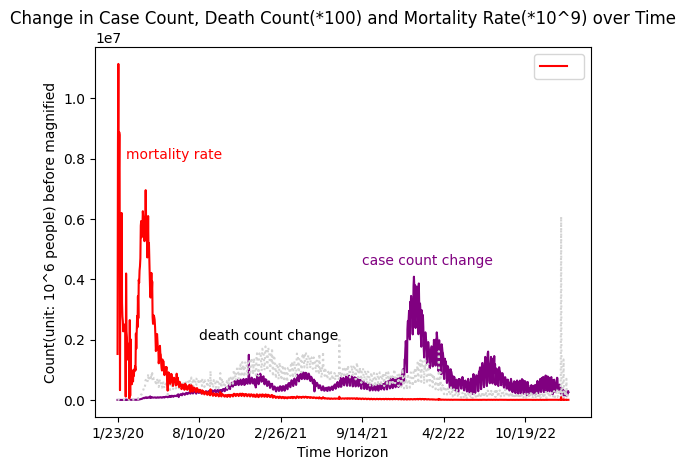

In [96]:
### plotting

# plotting
fig, ax = plt.subplots()

global_confirm_change.plot(ax=ax,legend=False,linestyle='-',color = 'purple')
ax.text(600,4500000,'case count change',color='purple')

global_death_change_magnified.plot(ax=ax,legend=False,linestyle='dotted',color = 'lightgray')
ax.text(200,2000000,'death count change',color='black')

seasonal_newcase_death_magnified.plot(ax=ax, legend=True, linestyle='solid',color = 'red')
ax.text(20,8000000,'mortality rate',color='red')


# set labels
ax.set_ylabel('Count(unit: 10^6 people) before magnified')
ax.set_xlabel('Time Horizon')
ax.set_title('Change in Case Count, Death Count(*100) and Mortality Rate(*10^9) over Time')


> To analyse the trend, the death count is magnified by 100 and the mortality rate is magnified by 1 ${\times}$ $10^{9}$. This is reasonable as we are multiplying the values by a constant coefficient, and if there exist a relation (which will be unchanged after the magnification due to the nature of constant mulitplication), it will be easier to tell.

The X variables chosen to test the hypotheses are death count and case count (based on time), and the Y variable is the mortality rate.

The exact daily data is graphed above. We can tell the mortality rate fluncation ends around 8/10/20, which is before any significant fluncation in the death change and the case change starting from the midpoint of 8/10/20 and 2/26/21. As well as the peak of the mortality rate lies between 1/23/20 and 8/10/20, while the case count peak lies between 9/14/21 and 4/2/22 and there still exist significant fluctuations after the peak.

Due to the large difference in distribution, we can first conclude that **data shows no significant relation between case count and the mortality rate**.

This can be reasoned as many countries enforced lockdowns when the mortality rate is high, resulting in a low case count; and they will end the quaratine if and only if the mortality rate is stabilized by exogenous factors such as mass vaccinations or herd immunity. For example, the Ontario government announced the end of lockdown on Nov.20, 2020 $^{(2)}$, when the mortality rate is ending its fluctuation, and it would be reasonable for the confirmation count to rise after people gaining back rights of outside activities as there exist more social interactions, resulting in more individuals and more ways to spread the virus.


However, when the mortality rate rises between 1/23/20 and 8/10/20, the death count also has an relatively sudden increase; and as the mortality rate goes down, the death count also has a downfall before 8/10/20. Thus we conclude **a rise in the death count rate will lead to an increase in the COVID-19 mortality rate, however, there exist other factors that can result in a more significant impact (on the mortality rate)**.

------
## Mortality Rate in different Countries

*$\color{gray}{\text{ "What kind of countries will have a low mortality rate?"}}$*

After denying the relation between confirmation count and mortality rate given data and conclude the relation between the death count and mortality rate, I wonder if there is other factors that impacts the mortality rate.

I assume **different countries will have different mortality rate due to the variations in exogenous factors**. If so, I would like to figure out what economic traits will result in a low mortality rate. There is countries like the US with 104,393,464 confirm count to date $^{(6)}$, and there is countries like Tokelau with a confirm count of 5. This huge difference among the categorial data caught my attention.

The x variable we are using here is **countries** while the y variable we are using is their individual **mortality rate**, which is calculated from the COVID-19 death data combined with the population data.

To calculate the individual mortality rate among different countries, we have to use the World Bank population data imported in [here](#Data-Set-Loading). We first need to clean the data set to get the variables we want. ]


In [97]:
### data cleaning

# clean the population DataFrame
population = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')
population = population.drop([266,267,268,269,270])
population = population.rename(columns= {'Country Name': 'Country/Region'})
population = population.loc[:,['Country/Region','2022 [YR2022]']]

In [98]:
### calculating table regarding each countries' mortality rate

# reset index and choose death count columns
country_death = global_death.set_index('Country/Region').iloc[:,3:]
country_total_death = country_death.loc[:,['12/23/22']]
country_total_death = country_total_death.rename(columns={'12/23/22':'Death Toll'})

# sum up duplicates(different provinces within the same country)
country_total_death = country_total_death.groupby([country_total_death.index]).sum()

# reset index
country_total_death = country_total_death.reset_index()

# merge the data sets
country_death_population = pd.merge(country_total_death, population, how = 'left', on = 'Country/Region')

# drop the na values
country_death_population = country_death_population.dropna()

# rename the column
country_death_population = country_death_population.rename(columns = {'2022 [YR2022]': 'Population'})

# calculate the mortality rate
country_death_population['Death Toll'] = country_death_population['Death Toll'].astype(int)
country_death_population['Population'] = country_death_population['Population'].astype(int)
country_death_population['Mortality Rate'] = country_death_population['Death Toll'] / country_death_population['Population']
country_death_population['Mortality Rate (%)'] = country_death_population['Mortality Rate'] * 100
country_death_population = country_death_population.drop('Mortality Rate', axis = 1)

country_death_population.head(10).style.set_caption('Table: the Death Toll, Population, Mortality Rate of individual Countries')

,Country/Region,Death Toll,Population,Mortality Rate (%)
0,Afghanistan,7845,41128771,0.019074
1,Albania,3595,2800251,0.128381
2,Algeria,6881,44903225,0.015324
3,Andorra,165,79824,0.206705
4,Angola,1928,35588987,0.005417
6,Antigua and Barbuda,146,93763,0.155712
7,Argentina,130080,46050112,0.282475
8,Armenia,8712,2780469,0.313328
9,Australia,16940,25941598,0.065301
10,Austria,21360,8970982,0.238101



> Countries with no population data or with no covid report data is dropped in this session. Only countries that are present in both data set are recorded.

> *Notice: As the world bank population data was last updated on 12/23/22, the same date is chosen to record the death toll.*

The variation in mortality rate among countries(and regions) are visible in the 10 heading of the data. For instance, Armenia has its mortality rate of 0.313328%, which is approximately 16.43 times of the Afghanistan's of 0.019074%. 

So far, we can conlude that **the mortality rate does vary among different countries**. However, this still does not answer my research question -

**"But why?** Why do some countries have a large mortality rate while others can bring it down?"

For now, I assume that the epidemic is strongly related to the economic development of a nation. Nations with high individual wealth are capable of more advanced medical resources, better public sanitization service, etc.

Thus to further investigate in this topic, let us ask another question: 

**"Does the individual wealth of a nation affect its COVID-19 mortality rate? If so, how?"**

Thus let us move further to invesgtigate the relation between **GDP per capita** and the **mortality rate**.

*Why GDP per capita instead of GDP? Because I do not believe GDP is representative enough for quality of life and individual wealth. Personally, I spent my early childhood in China whose GDP is about to take the crown, however, the individual quality of life and the government is still disappointing.*

-----
### The Relation between GDP per Capita and Mortality Rate

To enhance our understanding in the topic, let us find the countries with most GDP per capita and least GDP per capita first.


#### Mortality Rate of Countries with Most GDP per Capita

According to the World Bank $^{(3)}$, countries with the top three GDP per capita are:

- **Monaco**: $USD 234,315.5

- **Liechtenstein**: $USD 157,755.0

- **Luxembourg**: $USD 133,590.1

Rationally I would assume that **countries with highest GDP per capita would have the lowest mortality rate** due to the individual wealth they have.

In [99]:
### return the mortality table for top three countries with most GDP

# rename to suit the search method
country_death_population = country_death_population.rename(columns={'Country/Region': 'Country'})

# search
d1 = country_death_population[country_death_population.Country == 'Monaco']
d2 = country_death_population[country_death_population.Country == 'Liechtenstein']
d3 = country_death_population[country_death_population.Country == 'Luxembourg']

# merge
df = pd.merge(d1,d2,how = 'outer')
df = pd.merge(df,d3,how = 'outer')

gdp_capita_top = df
gdp_capita_top.style.set_caption('Table: Countries with Most GDP per capita')

,Country,Death Toll,Population,Mortality Rate (%)
0,Monaco,65,36469,0.178234
1,Liechtenstein,88,39327,0.223765
2,Luxembourg,1178,647204,0.182014


The X variable is country and the Y variable is mortality rate.

Compare to Australia whose GDP per capita is ranked 18 while having a mortality rate of 0.065301%, the mortality rate of Monaco, Liechtenstein and Luxembourg are slightly higher.

However, Monaco is a country with area of 1.98km$^2$ $^{(4)}$, as well as Liechtenstein's area is only 158 km$^2$ $^{(5)}$. Both countries have extreme small population, which means although their death toll is low, they will still have a high mortality rate.

#### Mortality Rate of Countries with Least GDP per Capita

According to the World Bank $^{(3)}$, countries with the least 3 GDP per capita are:

- **Burundi**: $USD 221.5

- **Afghanistan**: $USD 368.8

- **Somalia**: $USD 447.0

Rationally I would assume **them to have the high mortality rate** due to the lack in personal wealth.

In [100]:
### return the mortality table for top three countries with least GDP

# search
d11 = country_death_population[country_death_population.Country == 'Burundi']
d22 = country_death_population[country_death_population.Country == 'Afghanistan']
d33 = country_death_population[country_death_population.Country == 'Somalia']

# merge
dfleast = pd.merge(d11,d22,how = 'outer')
dfleast = pd.merge(dfleast,d33,how = 'outer')

gdp_capita_least = dfleast
gdp_capita_least.style.set_caption('Table: Countries with Least GDP per capita')

,Country,Death Toll,Population,Mortality Rate (%)
0,Burundi,38,12889576,0.000295
1,Afghanistan,7845,41128771,0.019074
2,Somalia,1361,17597511,0.007734


Here, the X variable is **GDP per capita** and the Y variable is **mortality rate**.

Let us combine the tables.

### Merge: GDP per capita and Mortality Rate

In [101]:
### merge the tables

# get the mean mortality rate of the countries with highest GDP per capita
gdp_capita_most_mean = gdp_capita_top['Mortality Rate (%)'].mean()

# get the mean mortality rate of the countries with lowest GDP per capita
gdp_capita_least_mean = gdp_capita_least['Mortality Rate (%)'].mean()

# merge
gdp_capita_plot = pd.merge(gdp_capita_least, gdp_capita_top, how = 'outer')

# better visualization
gdp_capita_plot['GDP per capita Rank'] = ['Lowest 1st', 'Lowest 2nd', 'Lowest 3rd', 'Highest 1st', 'Highest 2nd', 'Highest 3rd']
gdp_capita_plot.style.set_caption('Table: Countries with Highest GDP ')

,Country,Death Toll,Population,Mortality Rate (%),GDP per capita Rank
0,Burundi,38,12889576,0.000295,Lowest 1st
1,Afghanistan,7845,41128771,0.019074,Lowest 2nd
2,Somalia,1361,17597511,0.007734,Lowest 3rd
3,Monaco,65,36469,0.178234,Highest 1st
4,Liechtenstein,88,39327,0.223765,Highest 2nd
5,Luxembourg,1178,647204,0.182014,Highest 3rd


The variable used is the same as the previous table.

As we  can tell, the mean mortality rate of the three countries with top GDP per capita is almost 21.547 times higher than the three countries witht least GDP. 

Let us make this into a bar plot to visualize the difference.

Text(1.5, 0.2, 'High GDP per capita Mean')

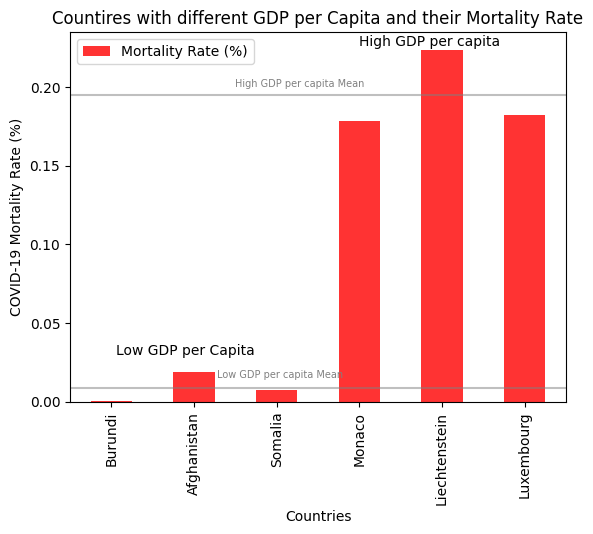

In [108]:
### give barplot

fig, ax = plt.subplots()

gdp_capita_plot = gdp_capita_plot.loc[:,['Country','Mortality Rate (%)']]
gdp_capita_plot.plot.bar(ax = ax, x='Country',color = 'r',alpha = 0.8)

ax.set_ylabel('COVID-19 Mortality Rate (%)')
ax.set_xlabel('Countries')
ax.set_title('Countires with different GDP per Capita and their Mortality Rate')
ax.text(0.055,0.03,'Low GDP per Capita',color='black')
ax.text(3,0.226,'High GDP per capita',color = 'black')
plt.axline(xy1 = [0,gdp_capita_most_mean],xy2 = [3,gdp_capita_most_mean],color = 'gray',alpha = 0.5)
plt.axline(xy1 = [0,gdp_capita_least_mean],xy2 = [3,gdp_capita_least_mean],color = 'gray',alpha = 0.5)

# adding mean line
ax.text(1.28,0.015,'Low GDP per capita Mean',color='gray', size = 7)
ax.text(1.5,0.20,'High GDP per capita Mean',color = 'gray',size = 7)

The barplot above visualized the morality difference between countries with least GDP per capita and countries with most GDP per capita. We can see the significant difference in individual mortality rates between countries with low GDP per capita and countries with high GDP per capita. The means of the two groups are also varied.

However, data shows that **countries with low GDP per capita tend to have a lower mortality rate than countries with high GDP per capita**, which is different from my initial assumption.

One way to explain this is that countries with the least GDP might have reported less death toll than the actual value due to exogenous factors; or they had stronger lockdown enforcement; or they have stronger average physical health, etc.

However, those are just unproved guess, which I hope can be examined in my later projects.

---
## Omicron Variant Proportion and the Mortality Rate

*$\color{gray}{\text{ "Does countries with higher omicron variant proportion have a higher mortality rate?"}}$*

Let us define the new term.

| $\color{red}{\text{ Omicron Variant Proportion}}$: the estimated proportion of Omicron COVID-19 case out of the total COVID-19 confirmation count. Can be referred as *"omicron proportion"*, etc.

To date, there exist more than 50 COVID-19 variants according to data from John Hopkins Medicine $^{(7)}$. Each time the COVID-19 mutates, it becomes either more lethal or easier to spread. Thus I wonder, "does countries with higher omicron variant proportion have a higher mortality rate?" My initial hypothesis is that **countries with higher omicron variant proportion will have a higher mortality rate** because omicron variant is more lethal than the initial COVID-19 virus.

The x variable here is the omicron proportion calculated from variants and global confirmation count data set and the y variable is the mortality proportion calculated from global death data set and the population data set.

Again, let us clean the two data set, calculate the values and take a glimpse first.

> *The variants dataset is loaded [here](#Data-Set-Loading).*

### Omicron Proportion and COVID-19 Mortality Rate

In [103]:
### glimpse

variants.head(3)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3


As we can see, the variants data set contains info such as location, date, variant types, sequence info, etc. Sequences and date are not useful towards our question thus the variables we are using from this data seet are *location, date and variant*.

Let us clean the data to get what we want.

In [117]:
### merge and calculate the value

country_confirm = global_confirm.set_index('Country/Region').iloc[:,3:]
country_total_confirm = country_confirm.loc[:,['12/31/20']]
country_total_confirm = country_total_confirm.rename(columns={'12/31/20':'Confirm Toll'})
country_total_confirm = country_total_confirm.groupby([country_total_confirm.index]).sum()
country_total_confirm = country_total_confirm.reset_index()
country_death_population = country_death_population.rename(columns={'Country':'Country/Region'})
country_death_confirm_population = pd.merge(country_death_population, country_total_confirm, on = 'Country/Region', how = 'inner')

variants_df = variants.loc[:,['location','date','variant']]
variants_df = variants_df.rename(columns={'location':'Country/Region','date':'Date','variant':'Type'})
omicron_df = variants_df[variants_df.Type == 'Omicron']
omicron_df = omicron_df.rename(columns={'Country/Region':'Country'})
country_death_confirm_population = country_death_confirm_population.rename(columns={'Country/Region':'Country'})

# generate a loop to compare and input data
res = []
for i in country_death_confirm_population['Country']:
    j = omicron_df[omicron_df.Country == i].count().Country.astype(int)
    res.append(j)
    if j != 0:
        country_death_confirm_population.loc[country_death_confirm_population[country_death_confirm_population.Country == i].index,'Omicron Count'] = j
    else:
        country_death_confirm_population.loc[i,'Omicron Count'] = None
        
country_death_confirm_population = country_death_confirm_population.dropna(0)
country_death_confirm_population['Omicron Prop (%)'] = (country_death_confirm_population['Omicron Count'] / country_death_confirm_population['Confirm Toll']) * 100
country_death_confirm_population['Death Toll'] = country_death_confirm_population['Death Toll'].astype(int)
country_death_confirm_population['Population'] = country_death_confirm_population['Population'].astype(int)
country_death_confirm_population['Confirm Toll'] = country_death_confirm_population['Confirm Toll'].astype(int)
country_death_confirm_population['Omicron Count'] = country_death_confirm_population['Omicron Count'].astype(int)
country_death_confirm_population.reset_index(drop=True).head(10).style.set_caption('Table: Mortality Rate and Omicron Proportion of Countries')

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_29671/3270189123.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  country_death_confirm_population = country_death_confirm_population.dropna(0)


,Country,Death Toll,Population,Mortality Rate (%),Confirm Toll,Omicron Count,Omicron Prop (%)
0,Angola,1928,35588987,0.005417,17553,28,0.159517
1,Argentina,130080,46050112,0.282475,1625514,44,0.002707
2,Australia,16940,25941598,0.065301,28425,44,0.154793
3,Austria,21360,8970982,0.238101,356063,43,0.012077
4,Bahrain,1539,1472233,0.104535,92675,29,0.031292
5,Bangladesh,29438,171186372,0.017196,513510,45,0.008763
6,Belgium,33228,11621253,0.285924,646496,45,0.006961
7,Belize,688,405272,0.169763,10776,24,0.222717
8,Benin,163,13352864,0.001221,3251,14,0.430637
9,Bosnia and Herzegovina,16221,3233526,0.501651,110985,36,0.032437


> Notice: Countries that are not present in both datasets are dropped

> The variants dataset was last updated on 12/31/20, thus that is where we slice our cumlative confirmation data

The table above gives us the mortality rate, omicron proportion and other factors of countries. 

We can tell that countries with high mortality rate such as Argentina have relatively low omicron proportion, and countries with low mortality rate such as Benin have high omicron proportion. This is an interesting trend, let us further visualize this.


(0.0, 0.6)

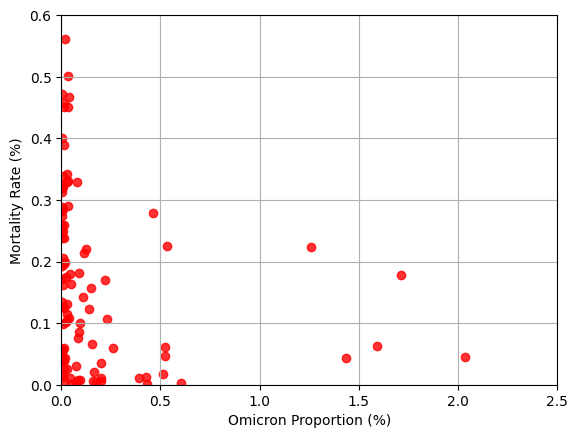

In [105]:
### plot

fig, ax = plt.subplots()

plt.scatter(x = country_death_confirm_population['Omicron Prop (%)'], y = country_death_confirm_population['Mortality Rate (%)'], color = 'red', alpha = 0.8)
ax.grid(True)
ax.set_xlabel('Omicron Proportion (%)')
ax.set_ylabel('Mortality Rate (%)')

# plt.axline(xy1 = [0.05,0.0],xy2 = [0.00,0.63],color = 'gray',alpha = 0.3)
plt.xlim(0,2.5)
plt.ylim(0,0.6)

For each individual observation (country), the x variable is the omicron proportion and the y variable is the mortality rate.

The graph above provides a inituitive relation between a country's mortality rate and its omicron proportion. We can tell the distribution is shaped similar to a negative log function, or *a typical exponential distribution*.

From the data given above, we can conclude the relation between the country's omicron proportion and its mortality rate as: 

**Most countries have both a low omicron proportion and a low mortality rate. Countries with a high omicron proportion tend to have a low mortality rate, and countries with a low omicron proportion tend to have a high mortality rate.**

----
## Conclusion

As the initial research question is "What factors will create significant impacts on the COVID-19 mortality rate? And how?", we can draw a final conclusion using the conclusion.
With Data given by John Hopkins University, the World Bank and Kaggle, I conclude the relation below:

Out of all confirmation count, death count, countries, individual wealth and omicron proportion, no significant relation were shown between the COVID-19 confirmation count and the COVID-19 mortality rate. In terms of COVID-19 death count, its rise will lead to an increase in the COVID-19 morality rate, however, it is not too significant comparing to other factors. COVID-19 morality rate does vary among countries; moreover, countries with least GDP per capita tend to have a lower mortality rate, vice versa. Finally, most countries have both a low omicron proportion and a low mortality rate. Countries with a high omicron proportion tend to have a low mortality rate, and countries with a low omicron proportion tend to have a high mortality rate.

-----
## References

**Data Source Reference:**

- *panelEnshengDongaHongruDuaLaurenGardneraEnvelope, A. links open overlay, EnshengDonga, a, HongruDua, &amp; LaurenGardneraEnvelope. (2020, February 19). An interactive web-based dashboard to track COVID-19 in Real time. The Lancet Infectious Diseases. Retrieved February 1, 2023, from https://www.sciencedirect.com/science/article/pii/S1473309920301201?via%3Dihub*

**Citation:**

1. *https://ourworldindata.org/explorers/coronavirus-data-explorer*
2. *https://www.jdsupra.com/legalnews/ontario-s-covid-19-response-a-history-1280608/*
3. *https://data.worldbank.org/indicator/NY.GDP.PCAP.CD*
4. *https://monacodc.org/monacohome.html*
5. *https://www.britannica.com/place/Liechtenstein*
6. *https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/*
7. *https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus/a-new-strain-of-coronavirus-what-you-should-know*

------
### For Marking Perpose

So it's easier for you to mark :D

1. Plot the histogram of your Xs and the histogram Y. If your X is discrete, you can show a boxplot instead of the histogram. Make sure you label the axis, and you have a title for your plot (this is marked).

[bar plot for countries with different GDP per capita and their mortality rate](#merge-gdp-per-capita-and-mortality-rate)

2. Plot the relation between Y and different Xs separately (Y on the vertical axis and X on the horizontal axis). Make sure you label the axis, and you have a title for your plot (this is marked).

[Compare the Change in Global COVID-19 Mortality Rate, Case Count and Death Count overtime](#Compare-the-Change-in-Global-COVID-19-Mortality-Rate,


3. Use Groupby to add more innovative graphs to better explain the covariates and their correlation with the outcome. For example, you can show the dis- tribution of covariates in different subgroups by age, gender, location, income group, type, etc. Make sure you label the axis, and you have a title for your plot (this is marked).

[Mortality Rate in different Countries](#Mortality-Rate-in-different-Countries) chunk 2 line 9

[Omicron Proportion and COVID-19 Mortality Rate](#omicron-proportion-and-COVID-19-mortality-rate) chunk 2 line 6